MNIST 基礎資料集
深度學習的 helloworld
0~9黑白照的資料集

## MNIST 使用
MNIST is a computer vision dataset. It consists of black and white images from zero to nine. Each image is 28 * 28 and have been flatten to 784 dimension vector. Also, it includes labels for each image, telling us which digit it is.

![Alt text](./images/dnn_implement/Selection_017.png)
![Alt text](./images/dnn_implement/Selection_018.png)


The MNIST data is split into three parts: 
1. 55000 training data (mnist.train) with a shape of [55000, 784]
2. 10000 test data (mnist.test) with a shape of [10000, 784]
3. 5000 validation data (mnist.validation) with a shape of [5000, 784]

you can access:  
training image as `mnist.train.images` (see below picture)  
training label as `mnist.train.labels` (see below picture)  
test image as `mnist.test.images`   
test label as `mnist.test.labels`   

Note that label is encoded as "one-hot vectors", which mean if the target image is 2, the label should be [0,0,1,0,0,0,0,0,0,0]


![Alt text](./images/dnn_implement/Selection_021.png)
![Alt text](./images/dnn_implement/Selection_020.png)

mnist.train.next_batch(5)去訓練資料抓5張
print(batch_ys.shape)

import matplotlib.pyplot as plt

plt.imshow(batch_xs[0].reshape(28, 28))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
first 5 labels [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]:

first 5 images [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]:

(5, 10)
(5, 784)


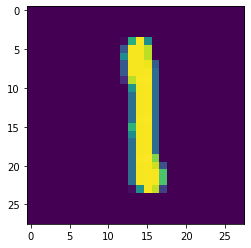

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
tf.reset_default_graph()

# Load mnist dataset
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

batch_xs, batch_ys = mnist.train.next_batch(5)

print('first 5 labels {}:\n'.format(batch_ys))
print('first 5 images {}:\n'.format(batch_xs))
print(batch_ys.shape)
print(batch_xs.shape)

import matplotlib.pyplot as plt

plt.imshow(batch_xs[0].reshape(28, 28))

x = tf.placeholder(tf.float32, [None, 784]) 一次丟N張的照片 none 每張是784向量
y = tf.placeholder(tf.float32, [None, 10]) 一次丟N張的照片 10是one-hot-encoding


# 建立簡單模型

In [12]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
tf.reset_default_graph()

# Load mnist dataset
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# Define image input 784 = 28 * 28. Note that DNN input is a vector
# [None, 784] mean that there are a batch of data and each of them is 784 dimension vector
x = tf.placeholder(tf.float32, [None, 784])

# Define label. There are totally 10 class (0-9)
y = tf.placeholder(tf.float32, [None, 10])

W = tf.Variable(tf.truncated_normal([784, 10], stddev=0.1))
b = tf.Variable(tf.truncated_normal([10], stddev=0.1))
y_predict = tf.matmul(x, W) + b


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    batch_xs, batch_ys = mnist.train.next_batch(5)
        
    y_predict_ = sess.run(y_predict, feed_dict={x: batch_xs, y: batch_ys})
    print(y_predict_)
    print(y_predict_.shape)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
[[-1.4334959  -0.76011515 -1.3327067  -0.09457059 -0.01114367 -0.16859426
   0.952611    0.10942791 -1.2817466  -0.7826921 ]
 [ 0.01969196  0.29250538  0.5686713   0.21260937 -1.3440645   0.3973139
   0.09042579 -0.42369497 -0.06636701 -1.0330623 ]
 [ 1.7785219   0.7757135   0.15933594 -0.19476564 -0.22079286  0.94446707
   0.32802245 -0.26924878 -0.7887764  -0.01541788]
 [ 1.0788614  -0.03137057 -0.8063443  -0.19644739  0.8241819   0.1460176
  -0.23344086  0.01601024 -1.7146298  -0.29485235]
 [ 1.1814967   0.24996424 -0.3956877   0.45606297 -0.5989076   0.7897457
   0.39256778  0.14799078 -1.1777437   0.13037804]]
(5, 10)


## 建立DNN神經網路模型 

In [11]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
tf.reset_default_graph()

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

INPUT_NODE =784

LAYER1_NODE = 128
LAYER2_NODE = 64
LAYER3_NODE = 10


x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.truncated_normal([INPUT_NODE, LAYER1_NODE], stddev=0.1))
b1 = tf.Variable(tf.truncated_normal([LAYER1_NODE], stddev=0.1))
W2 = tf.Variable(tf.truncated_normal([LAYER1_NODE, LAYER2_NODE], stddev=0.1))
b2 = tf.Variable(tf.truncated_normal([LAYER2_NODE], stddev=0.1))
W3 = tf.Variable(tf.truncated_normal([LAYER2_NODE, LAYER3_NODE], stddev=0.1))
b3 = tf.Variable(tf.truncated_normal([LAYER3_NODE], stddev=0.1))

layer_1 = tf.matmul(x, W1) + b1
out1 = tf.nn.relu(layer_1)
layer_2 = tf.matmul(out1, W2) + b2
out2 = tf.nn.relu(layer_2)
layer_3 = tf.matmul(out2, W3) + b3
out3 = tf.nn.relu(layer_3)

y_predict = out3


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    batch_xs, batch_ys = mnist.train.next_batch(5)
        
    y_predict_ = sess.run(y_predict, feed_dict={x: batch_xs, y: batch_ys})
    print(y_predict_)
    print(y_predict_.shape)
    

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
[[0.00537947 0.07978871 0.         0.         0.03151332 0.27973643
  0.04589504 0.         0.5698735  0.        ]
 [0.         0.         0.         0.         0.4519012  0.52777255
  0.228033   0.         0.25697675 0.        ]
 [0.         0.         0.27386382 0.         0.09030299 0.27049312
  0.00587577 0.         0.4377197  0.        ]
 [0.         0.25621703 0.0647132  0.         0.         0.5529596
  0.26548126 0.14872824 0.28003764 0.        ]
 [0.         0.04047399 0.43868217 0.         0.         0.18563145
  0.05248273 0.         0.40567395 0.02477902]]
(5, 10)
